In [31]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report 
import seaborn as sn 
import matplotlib.pyplot as plt 
from sklearn import tree 

ModuleNotFoundError: No module named 'pydotplus'

In [13]:
data = pd.read_csv("C:/Users/USER/OneDrive/Desktop/G NAVEEN KUMAR GOWDA/DATA/DataSet/college_student_placement_dataset.csv")
data

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [14]:
data.shape

(10000, 10)

In [15]:
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [16]:
data.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [20]:
x=data.iloc[:,1:-1].values  
y=data.iloc[:,-1].values
print(x,y)

[[107 161 173 ...   8   8   4]
 [ 97  52  82 ...   7   8   0]
 [109  36 128 ...   3   1   1]
 ...
 [ 89 108 170 ...   3   9   5]
 [107 377 437 ...   7   5   1]
 [109 441 522 ...   3   5   5]] [0 0 0 ... 0 0 0]


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41) 
print(x_train,x_test,y_train,y_test)

[[ 83 470 518 ...  10   8   2]
 [100 284 332 ...   8   7   5]
 [107 433 441 ...   2  10   4]
 ...
 [102 430 486 ...   0   2   0]
 [128 470 500 ...   6   2   5]
 [114 186 198 ...   7   1   4]] [[109 289 370 ...   7   3   4]
 [ 91 274 308 ...   4   9   0]
 [104 399 422 ...   4  10   4]
 ...
 [ 80 398 429 ...   1   3   0]
 [113 311 364 ...   8   2   3]
 [ 98  53 135 ...   0   2   0]] [1 0 1 ... 0 1 0] [0 0 1 ... 0 1 0]


In [18]:
label=LabelEncoder()
data['Prev_Sem_Result']=label.fit_transform (data['Prev_Sem_Result'])
data['CGPA']=label.fit_transform (data['CGPA'])
data['Internship_Experience']=label.fit_transform (data['Internship_Experience'])
data['Placement']=label.fit_transform (data['Placement'])
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,341,374,4,0,1,8,0,1
9996,CLG0098,70,425,479,7,0,0,7,2,0
9997,CLG0066,89,108,170,3,1,3,9,5,0
9998,CLG0045,107,377,437,3,0,7,5,1,0
9999,CLG0060,109,441,522,8,0,3,5,5,0


In [24]:
sc=StandardScaler() 
x_train=sc.fit_transform(x_train) 
x_test=sc.transform(x_test)
print(x_train)
print(x_test)

[[-1.08174817  1.49086126  1.48717154 ...  1.61159684  0.84909044
  -0.29498005]
 [ 0.04272035  0.20977451  0.22785013 ...  0.97447613  0.50461188
   1.448499  ]
 [ 0.50573681  1.23602143  0.96583955 ... -0.93688601  1.53804756
   0.86733931]
 ...
 [ 0.17501077  1.21535874  1.27051409 ... -1.57400672 -1.21778092
  -1.45729941]
 [ 1.89478616  1.49086126  1.36530172 ...  0.33735542 -1.21778092
   1.448499  ]
 [ 0.96875326 -0.46520668 -0.67940293 ...  0.65591577 -1.56225948
   0.86733931]]
[[ 0.63802722  0.24421233  0.48513084 ...  0.65591577 -0.87330236
   0.86733931]
 [-0.55258651  0.14089888  0.06535704 ... -0.2997653   1.193569
  -1.45729941]
 [ 0.30730118  1.00184428  0.8371992  ... -0.2997653   1.53804756
   0.86733931]
 ...
 [-1.28018379  0.99495671  0.88459301 ... -1.25544636 -0.87330236
  -1.45729941]
 [ 0.90260805  0.39573872  0.44450757 ...  0.97447613 -1.21778092
   0.28617963]
 [-0.08957006 -1.38125258 -1.10594728 ... -1.57400672 -1.21778092
  -1.45729941]]


In [26]:
model=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0) 
model.fit(x_train,y_train) 
y_pred=model.predict(x_test) 
model

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [27]:
print('Random Forest Classifier') 
conf_mat=metrics.confusion_matrix(y_test, y_pred) 
print('\n Confusion Matrix : \n', conf_mat) 
Accuracy_score=accuracy_score(y_test,y_pred) 
print('Accuracy Score : ', Accuracy_score) 
print('Accuracy in Percentage : ', 
int(Accuracy_score*100),'%') 
print('\n',classification_report(y_pred,y_test))

Random Forest Classifier

 Confusion Matrix : 
 [[2467    1]
 [   1  531]]
Accuracy Score :  0.9993333333333333
Accuracy in Percentage :  99 %

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2468
           1       1.00      1.00      1.00       532

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Predicted,0,1
Actual,,
0,2467,1
1,1,531


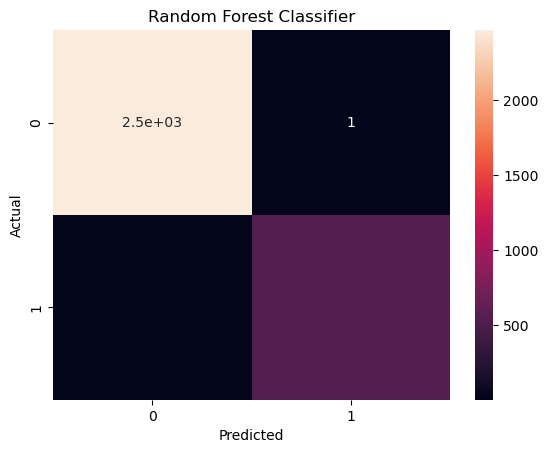

In [29]:
conf_mat=pd.crosstab(y_test,y_pred, rownames=['Actual'],colnames=['Predicted']) 
sn.heatmap(conf_mat, annot=True).set(title='Random Forest Classifier')
conf_mat

In [30]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(model.estimators_[0], out_file=None,feature_names=data.columns[:1],class_names=['0', '1'],filled=True, rounded=True,special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)    
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'